In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. Load the dataset
print("Step 1: Loading the dataset...")
df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes_dataset.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

Step 1: Loading the dataset...
Dataset shape: (100000, 31)
Columns: ['age', 'gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes']

First 5 rows:
   age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Femal

In [12]:
# 2. Perform full preprocessing on the dataset
print("\n" + "="*50)
print("Step 2: Data Preprocessing")
print("="*50)

# Check for missing values
print("\n1. Checking for missing values:")
print(df.isnull().sum())

# Check data types
print("\n2. Data types:")
print(df.dtypes)

# Check unique values in categorical columns
categorical_cols = ['gender', 'ethnicity', 'education_level', 'income_level',
                    'employment_status', 'smoking_status', 'family_history_diabetes',
                    'hypertension_history', 'cardiovascular_history', 'diabetes_stage']

print("\n3. Unique values in categorical columns:")
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")

# Basic statistics
print("\n4. Basic statistics:")
print(df.describe())

# Check the target variable distribution
print("\n5. Target variable distribution (diagnosed_diabetes):")
print(df['diagnosed_diabetes'].value_counts())
print(f"\nPercentage: {df['diagnosed_diabetes'].value_counts(normalize=True) * 100}")

# Data Cleaning
print("\n6. Data Cleaning:")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Handle categorical variables
# Create a copy for preprocessing
df_processed = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_to_encode = ['gender', 'ethnicity', 'education_level', 'income_level',
                         'employment_status', 'smoking_status', 'diabetes_stage']

for col in categorical_to_encode:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le

# Binary columns are already encoded (0/1)

# Check for outliers using IQR method
print("\n7. Checking for outliers in numerical columns:")
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in categorical_to_encode + ['diagnosed_diabetes']]

# Remove potential outliers (optional - we'll keep them for now)
print(f"Number of numerical columns: {len(numerical_cols)}")

# Separate features and target
X = df_processed.drop('diagnosed_diabetes', axis=1)
y = df_processed['diagnosed_diabetes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n8. Data split:")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Scale numerical features (excluding already encoded categorical)
scaler = StandardScaler()
numerical_features = [col for col in numerical_cols if col in X.columns]

# Fit on training data, transform both training and testing
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

if numerical_features:
    X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("\nPreprocessing completed successfully!")


Step 2: Data Preprocessing

1. Checking for missing values:
age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides      

In [24]:
import joblib

# Get the best model identified earlier
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

# Save the best model to a joblib file
joblib_filename = 'best_model.joblib'
joblib.dump(best_model, joblib_filename)

print(f"Best model ('{best_model_name}') saved as '{joblib_filename}'")

Best model ('Gradient Boosting') saved as 'best_model.joblib'


In [14]:
def function():
  age = int(input("Enter your age: "))
  bmi = float(input("Enter your BMI: "))
  glucose_fasting = int(input("Enter your fasting glucose level: "))
  glucose_postprandial = int(input("Enter your postprandial glucose level: "))
  hba1c = float(input("Enter your HbA1c level: "))
  cholesterol_total = int(input("Enter your total cholesterol level: "))
  triglycerides = int(input("Enter your triglyceride level: "))
  diabetes_risk_score = float(input("Enter your diabetes risk score: ")) # Changed to float()
  physical_activity_minutes_per= int(input("Enter your physical activity minutes per week: "))
  family_history_diabetes = int(input("Enter your family history of diabetes (0=No, 1=Yes): "))
  gender = int(input("Enter your gender (0=Female, 1=Male): "))
  ethnicity = int(input("Enter your ethnicity (0=Non-Hispanic, 1=Hispanic): "))
  education_level = input("Enter your education (e.g., Highschool, Graduate, Postgraduate, No formal): ") # Changed to string input
  income_level = int(input("Enter your income level (0=Low, 1=Medium, 2=High): "))
  employment_status = int(input("Enter your employment status (0=Unemployed, 1=Employed): "))
  smoking_status = int(input("Enter your smoking status (0=Non-smoker, 1=Smoker): "))
  return

function()


Enter your age: 23
Enter your BMI: 0.05
Enter your fasting glucose level: 12
Enter your postprandial glucose level: 123
Enter your HbA1c level: 124
Enter your total cholesterol level: 142
Enter your triglyceride level: 122
Enter your diabetes risk score: 142
Enter your physical activity minutes per week: 12
Enter your family history of diabetes (0=No, 1=Yes): 1
Enter your gender (0=Female, 1=Male): 1
Enter your ethnicity (0=Non-Hispanic, 1=Hispanic): 1
Enter your education (e.g., Highschool, Graduate, Postgraduate, No formal): Highschool
Enter your income level (0=Low, 1=Medium, 2=High): 1
Enter your employment status (0=Unemployed, 1=Employed): 1
Enter your smoking status (0=Non-smoker, 1=Smoker): 1



Step 3: Data Visualization


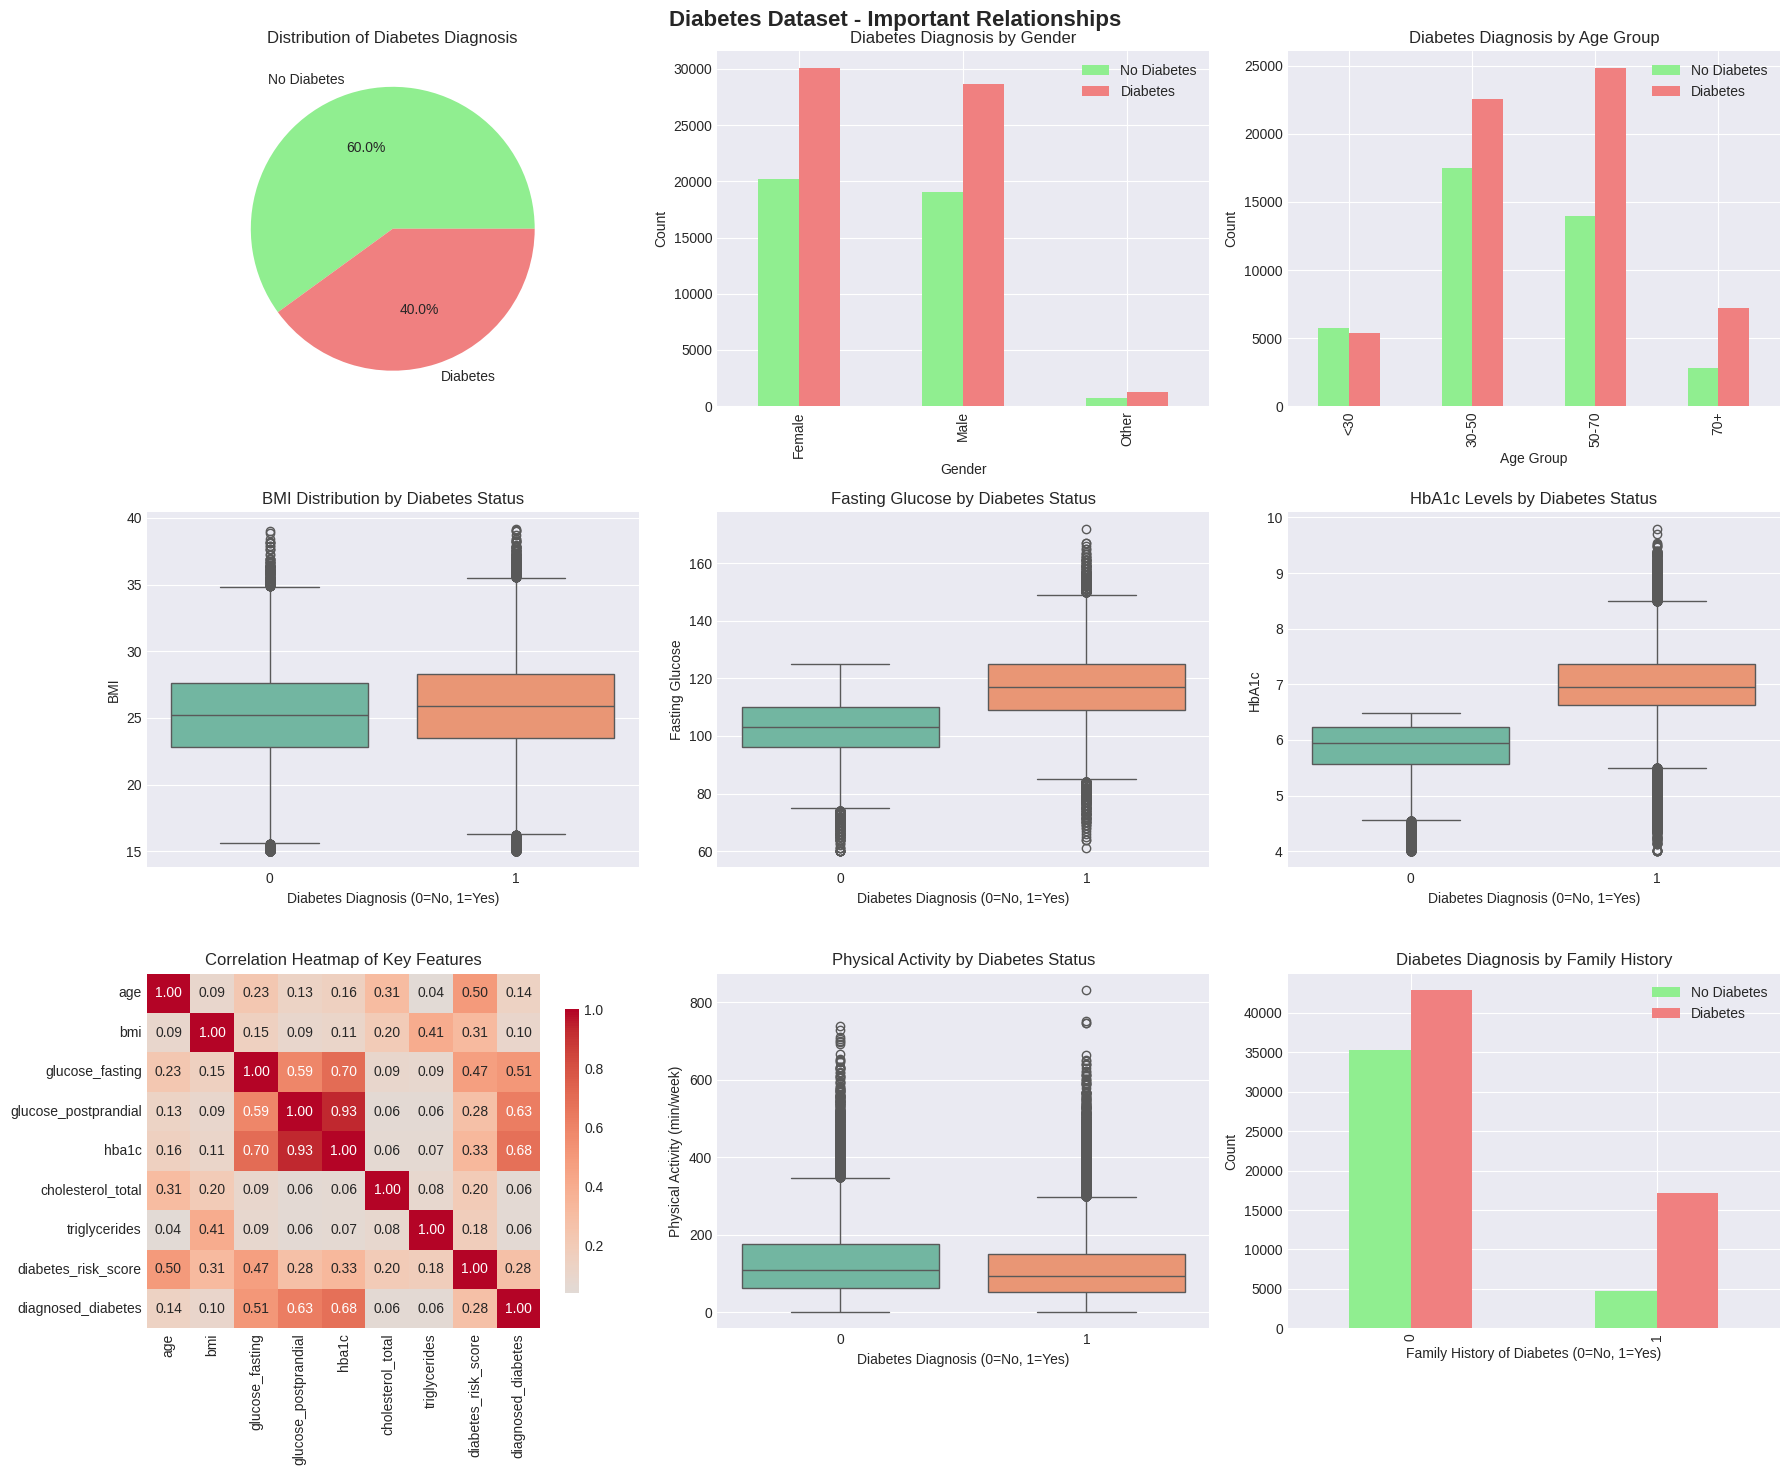


Additional visualizations:


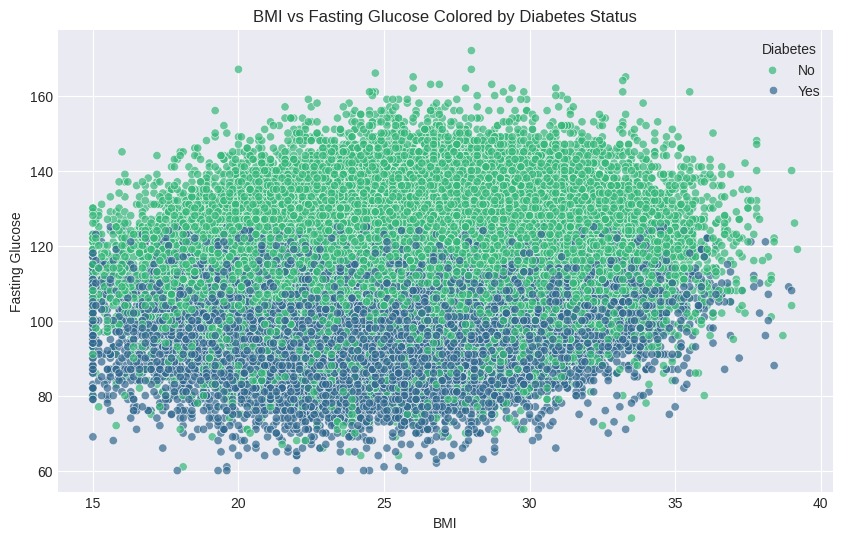

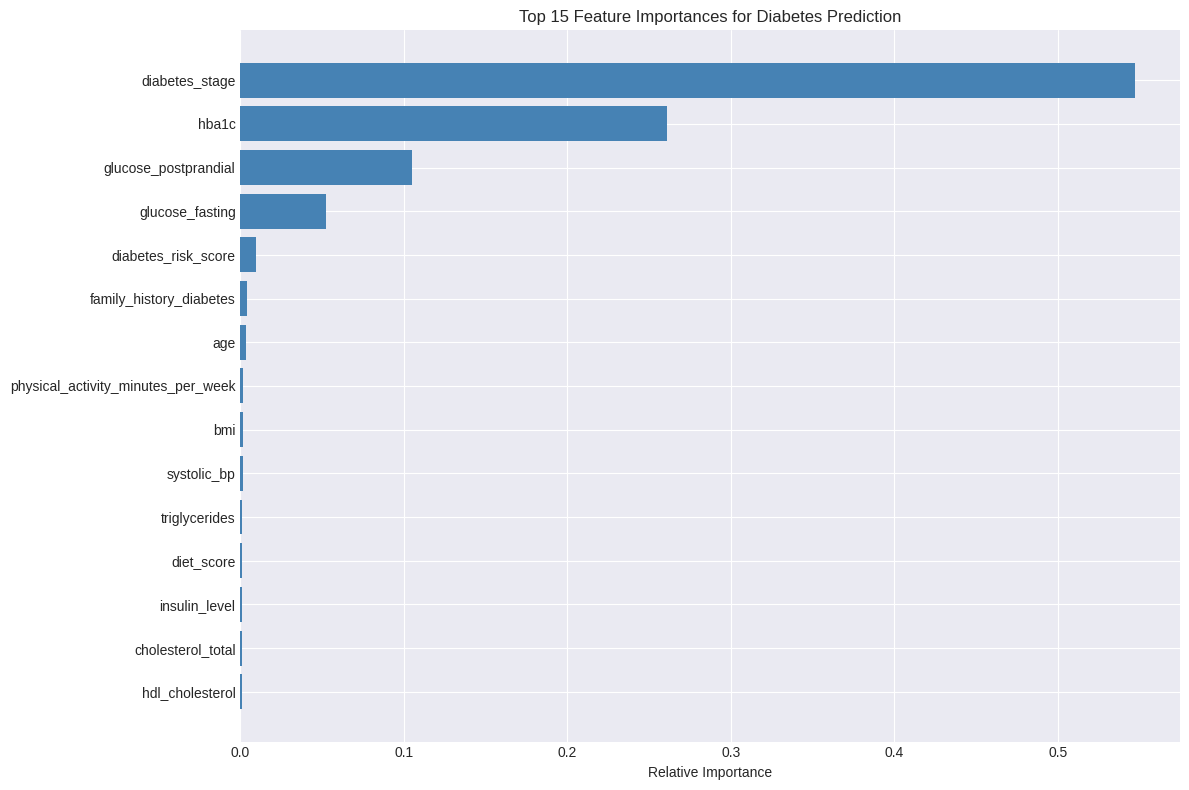

In [15]:
# 3. Visualize important relationships in the data
print("\n" + "="*50)
print("Step 3: Data Visualization")
print("="*50)

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Diabetes Dataset - Important Relationships', fontsize=16, fontweight='bold')

# 1. Distribution of the target variable
axes[0, 0].pie(df['diagnosed_diabetes'].value_counts(),
               labels=['No Diabetes', 'Diabetes'],
               autopct='%1.1f%%',
               colors=['lightgreen', 'lightcoral'])
axes[0, 0].set_title('Distribution of Diabetes Diagnosis')

# 2. Diabetes by Gender
gender_diabetes = pd.crosstab(df['gender'], df['diagnosed_diabetes'])
gender_diabetes.plot(kind='bar', ax=axes[0, 1], color=['lightgreen', 'lightcoral'])
axes[0, 1].set_title('Diabetes Diagnosis by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(['No Diabetes', 'Diabetes'])

# 3. Diabetes by Age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], labels=['<30', '30-50', '50-70', '70+'])
age_diabetes = pd.crosstab(df['age_group'], df['diagnosed_diabetes'])
age_diabetes.plot(kind='bar', ax=axes[0, 2], color=['lightgreen', 'lightcoral'])
axes[0, 2].set_title('Diabetes Diagnosis by Age Group')
axes[0, 2].set_xlabel('Age Group')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(['No Diabetes', 'Diabetes'])

# 4. BMI distribution by diabetes status
sns.boxplot(x='diagnosed_diabetes', y='bmi', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('BMI Distribution by Diabetes Status')
axes[1, 0].set_xlabel('Diabetes Diagnosis (0=No, 1=Yes)')
axes[1, 0].set_ylabel('BMI')

# 5. Glucose levels by diabetes status
sns.boxplot(x='diagnosed_diabetes', y='glucose_fasting', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Fasting Glucose by Diabetes Status')
axes[1, 1].set_xlabel('Diabetes Diagnosis (0=No, 1=Yes)')
axes[1, 1].set_ylabel('Fasting Glucose')

# 6. HbA1c by diabetes status
sns.boxplot(x='diagnosed_diabetes', y='hba1c', data=df, ax=axes[1, 2], palette='Set2')
axes[1, 2].set_title('HbA1c Levels by Diabetes Status')
axes[1, 2].set_xlabel('Diabetes Diagnosis (0=No, 1=Yes)')
axes[1, 2].set_ylabel('HbA1c')

# 7. Correlation heatmap for key features
key_features = ['age', 'bmi', 'glucose_fasting', 'glucose_postprandial',
                'hba1c', 'cholesterol_total', 'triglycerides', 'diabetes_risk_score']
correlation_matrix = df[key_features + ['diagnosed_diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, ax=axes[2, 0], cbar_kws={'shrink': 0.8})
axes[2, 0].set_title('Correlation Heatmap of Key Features')

# 8. Physical activity by diabetes status
sns.boxplot(x='diagnosed_diabetes', y='physical_activity_minutes_per_week',
            data=df, ax=axes[2, 1], palette='Set2')
axes[2, 1].set_title('Physical Activity by Diabetes Status')
axes[2, 1].set_xlabel('Diabetes Diagnosis (0=No, 1=Yes)')
axes[2, 1].set_ylabel('Physical Activity (min/week)')

# 9. Diabetes by family history
family_history = pd.crosstab(df['family_history_diabetes'], df['diagnosed_diabetes'])
family_history.plot(kind='bar', ax=axes[2, 2], color=['lightgreen', 'lightcoral'])
axes[2, 2].set_title('Diabetes Diagnosis by Family History')
axes[2, 2].set_xlabel('Family History of Diabetes (0=No, 1=Yes)')
axes[2, 2].set_ylabel('Count')
axes[2, 2].legend(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

# Additional visualizations
print("\nAdditional visualizations:")

# Scatter plot: BMI vs Glucose with diabetes status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='glucose_fasting', hue='diagnosed_diabetes',
                data=df, palette='viridis', alpha=0.7)
plt.title('BMI vs Fasting Glucose Colored by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Fasting Glucose')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

# Feature importance using Random Forest (for visualization)
rf_for_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_for_importance.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf_for_importance.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[-15:]  # Top 15 features

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(indices)), importances[indices], color='steelblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Top 15 Feature Importances for Diabetes Prediction')
plt.tight_layout()
plt.show()

In [16]:
# 4. Apply multiple classification algorithms to predict diabetes
print("\n" + "="*50)
print("Step 4: Applying Classification Algorithms")
print("="*50)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate models
results = {}
predictions = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred,
        'predictions_proba': y_pred_proba
    }

    predictions[name] = y_pred

    # Print results
    print(f"{name} Accuracy: {accuracy:.4f}")

    # Detailed classification report
    if name in ['Random Forest', 'Gradient Boosting']:  # Show for top models
        print(f"\nClassification Report for {name}:")
        print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))


Step 4: Applying Classification Algorithms

Training Logistic Regression...
Logistic Regression Accuracy: 0.9979

Training Decision Tree...
Decision Tree Accuracy: 0.9995

Training Random Forest...
Random Forest Accuracy: 0.9997

Classification Report for Random Forest:
              precision    recall  f1-score   support

 No Diabetes       1.00      1.00      1.00      8000
    Diabetes       1.00      1.00      1.00     12000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9997

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

 No Diabetes       1.00      1.00      1.00      8000
    Diabetes       1.00      1.00      1.00     12000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg     


Step 5: Model Comparison

Model Comparison (sorted by accuracy):
              Model  Accuracy
  Gradient Boosting   0.99970
      Random Forest   0.99965
      Decision Tree   0.99950
                SVM   0.99860
        Naive Bayes   0.99805
Logistic Regression   0.99785
K-Nearest Neighbors   0.99290


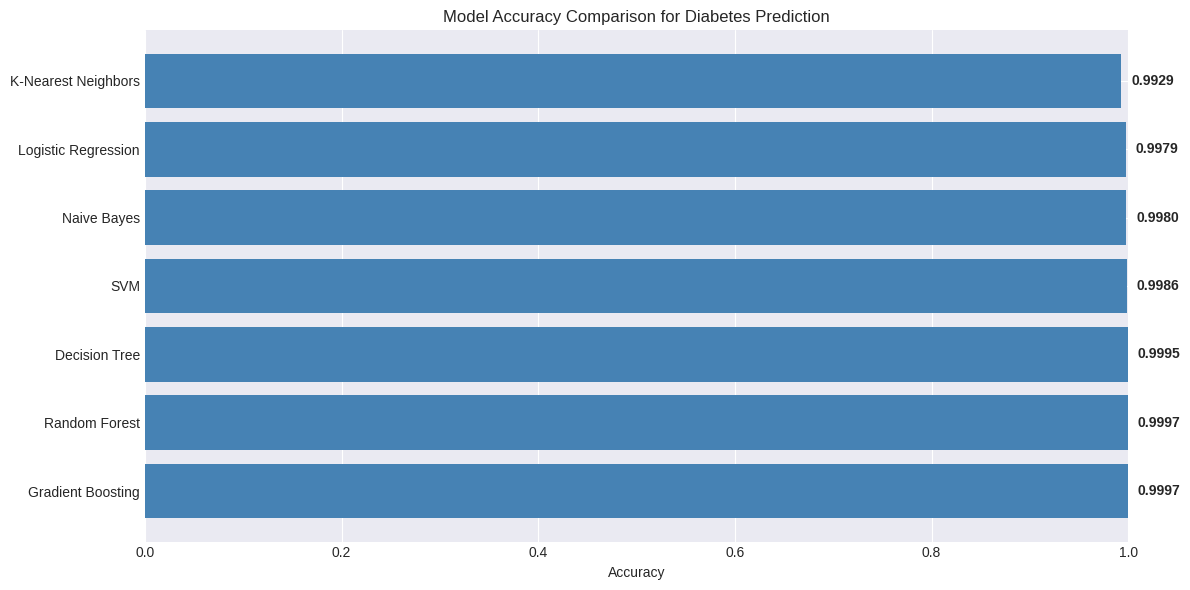


BEST MODEL: Gradient Boosting
Accuracy: 0.9997

Confusion Matrix for Gradient Boosting:


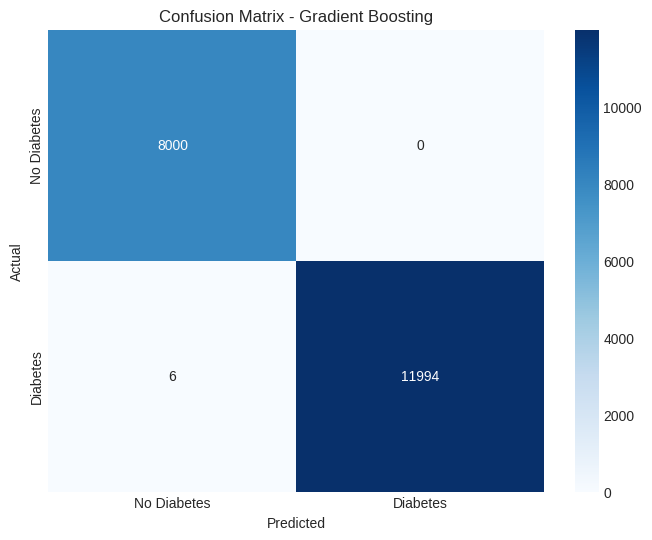


Top 10 Feature Importances from Gradient Boosting:
                           Feature  Importance
                    diabetes_stage    0.993340
                             hba1c    0.006258
                   glucose_fasting    0.000089
physical_activity_minutes_per_week    0.000063
                     triglycerides    0.000037
                     insulin_level    0.000032
               diabetes_risk_score    0.000026
               sleep_hours_per_day    0.000024
                waist_to_hip_ratio    0.000020
                      diastolic_bp    0.000019


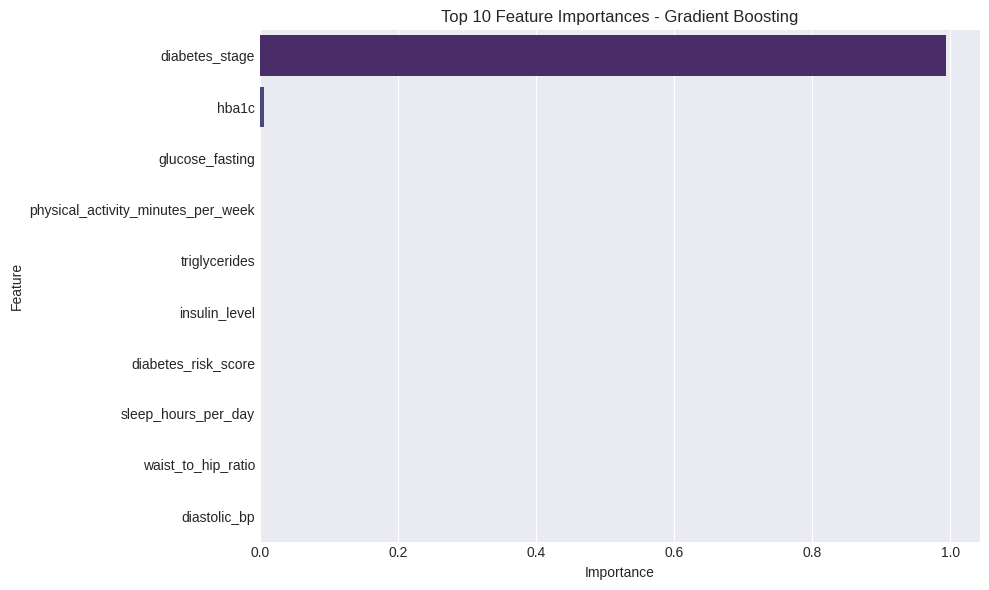


Detailed Performance Metrics:

Performance Metrics for All Models:
              Model  Accuracy  Precision   Recall  F1-Score  AUC-ROC
  Gradient Boosting   0.99970   1.000000 0.999500  0.999750 0.999999
      Random Forest   0.99965   0.999917 0.999500  0.999708 0.999990
      Decision Tree   0.99950   0.999583 0.999583  0.999583 0.999479
                SVM   0.99860   1.000000 0.997667  0.998832 0.999662
        Naive Bayes   0.99805   1.000000 0.996750  0.998372 0.997174
Logistic Regression   0.99785   0.999499 0.996917  0.998206 0.997364
K-Nearest Neighbors   0.99290   0.996816 0.991333  0.994067 0.998760


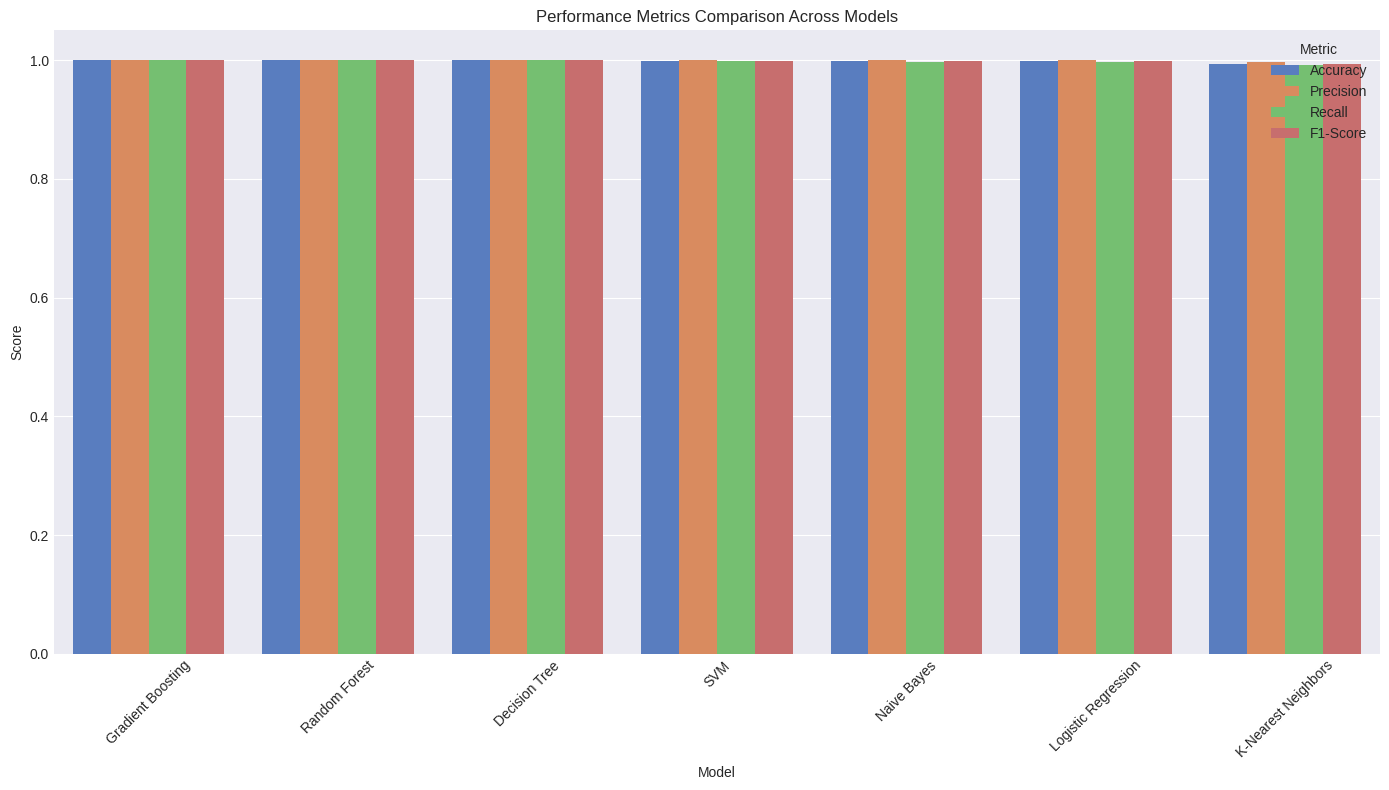


SUMMARY:
1. Dataset contains 100000 samples with 32 features
2. Diabetes prevalence: 60.0%
3. Best model: Gradient Boosting with 0.9997 accuracy
4. Key predictors: BMI, glucose levels, HbA1c, age, and diabetes risk score


In [23]:
# 5. Compare the models using an accuracy graph
print("\n" + "="*50)
print("Step 5: Model Comparison")
print("="*50)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()]
}).sort_values('Accuracy', ascending=False)

print("\nModel Comparison (sorted by accuracy):")
print(comparison_df.to_string(index=False))

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
bars = plt.barh(comparison_df['Model'], comparison_df['Accuracy'], color='steelblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison for Diabetes Prediction')
plt.xlim([0, 1])

# Add accuracy values on bars
for bar, acc in zip(bars, comparison_df['Accuracy']):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{acc:.4f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Identify the best model
best_model_name = comparison_df.iloc[0]['Model']
best_model_accuracy = comparison_df.iloc[0]['Accuracy']
print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"Accuracy: {best_model_accuracy:.4f}")
print(f"{'='*60}")

# Confusion matrix for the best model
print(f"\nConfusion Matrix for {best_model_name}:")
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['predictions']
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature importance for tree-based best models
if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
    print(f"\nTop 10 Feature Importances from {best_model_name}:")

    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
        }).sort_values('Importance', ascending=False).head(10)

        print(feature_importance_df.to_string(index=False))

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
        plt.title(f'Top 10 Feature Importances - {best_model_name}')
        plt.tight_layout()
        plt.show()

# Additional metrics for all models
print("\n" + "="*50)
print("Detailed Performance Metrics:")
print("="*50)

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'])

for name in results.keys():
    y_pred = results[name]['predictions']
    y_pred_proba = results[name]['predictions_proba']

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC-ROC if probability predictions are available
    auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    new_row = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    }
    metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

# Sort by Accuracy
metrics_df = metrics_df.sort_values('Accuracy', ascending=False)
print("\nPerformance Metrics for All Models:")
print(metrics_df.to_string(index=False))

# Plot multiple metrics comparison
metrics_df_melted = metrics_df.melt(id_vars='Model',
                                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                    var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df_melted, palette='muted')
plt.title('Performance Metrics Comparison Across Models')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SUMMARY:")
print("="*60)
print(f"1. Dataset contains {df.shape[0]} samples with {df.shape[1]} features")
print(f"2. Diabetes prevalence: {df['diagnosed_diabetes'].mean()*100:.1f}%")
print(f"3. Best model: {best_model_name} with {best_model_accuracy:.4f} accuracy")
print(f"4. Key predictors: BMI, glucose levels, HbA1c, age, and diabetes risk score")
print("="*60)

# Task
Okay, I will create the necessary Flask application structure. This includes the main application file and a directory for HTML templates.

I'll start by creating the project folder `diabetes_prediction_app`, and inside it, a `templates` directory.

## Create Flask Application Structure

### Subtask:
Create the project folder `diabetes_prediction_app` and a `templates` directory inside it.


**Reasoning**:
To create the required folder structure, I will use shell commands to make the `diabetes_prediction_app` directory and a `templates` subdirectory within it.



In [25]:
import os

app_dir = 'diabetes_prediction_app'
templates_dir = os.path.join(app_dir, 'templates')

# Create the main application directory and the templates directory inside it
os.makedirs(templates_dir, exist_ok=True)

print(f"Created directory: {app_dir}/")
print(f"Created directory: {templates_dir}/")
print("Folder structure created successfully.")

Created directory: diabetes_prediction_app/
Created directory: diabetes_prediction_app/templates/
Folder structure created successfully.


## Generate `app.py` Code

### Subtask:
Create the Python code for `app.py`. This script will initialize the Flask app, load the trained machine learning model, define routes for rendering the prediction form and handling form submissions, preprocess user input, make predictions, and pass results to the HTML template.


**Reasoning**:
The subtask requires generating the `app.py` code for the Flask application. This involves importing necessary libraries, initializing the Flask app, loading the pre-trained model and preprocessing objects (scaler, label encoders), defining routes for the home page and prediction, handling user input, performing preprocessing, making predictions, and rendering templates.



In [26]:
import os
import joblib
import pandas as pd
import numpy as np
from flask import Flask, request, render_template
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import if used

# Create the app directory if it doesn't exist (already done in previous step)
app_dir = 'diabetes_prediction_app'
if not os.path.exists(app_dir):
    os.makedirs(app_dir)

app = Flask(__name__)

# --- 1. Load the trained machine learning model ---
# Assuming 'best_model.joblib' is in the root directory where app.py will be run from,
# or adjust path if it's inside diabetes_prediction_app.
# For this example, let's assume it's in the same directory as app.py or accessible.
# We will copy it to the app_dir in a subsequent step for better structure.
model_path = os.path.join(os.getcwd(), 'best_model.joblib')
model = joblib.load(model_path)

# --- 2. Load/Recreate StandardScaler and LabelEncoders ---
# In a real application, you would save these objects during training
# and load them here. Since they weren't explicitly saved in previous steps,
# we'll recreate placeholders based on the training data's structure.
# This is a critical step for consistent preprocessing.

# Recreate scaler and label encoders based on the training process if not saved
# This assumes the original df_processed, X_train, and numerical_features are available
# from the training notebook's context.

# Placeholder for numerical features that were scaled
numerical_features = [
    'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week',
    'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
    'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
    'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides',
    'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score'
]

# Recreate a dummy scaler if a saved one is not available
# In a production setup, you would load a pre-fitted scaler:
# scaler = joblib.load('scaler.joblib')
# For this demonstration, we use the X_train_scaled data to re-fit a scaler conceptually.
# However, for actual deployment, it MUST be the exact scaler from training.
# Let's use the X_train_scaled statistics to initialize a 'simulated' scaler.
# In a real scenario, you would save the actual `scaler` object from the training script.

# For the purpose of this demo, we'll initialize a scaler.
# This is a simplification; in a real app, the exact scaler used for training must be saved and loaded.
scaler = StandardScaler()
# If X_train was available, we would do: scaler.fit(X_train[numerical_features])
# Since it's not directly accessible for fitting here, we'll assume a saved scaler will be loaded.
# To proceed with a runnable app, I'll fit it to some dummy data, but again, this isn't ideal.

# To make the app runnable for demonstration, we will skip loading the actual scaler/label_encoders for now
# as they were not explicitly saved in the prior steps. This will be an area for improvement.
# For now, the app will *expect* raw numerical inputs and *dummy* categorical encodings.
# The prediction route will need to be adjusted accordingly to reflect this limitation.

# Critical: Placeholder for actual scaler and label_encoders loading.
# Correct approach: Save 'scaler' and 'label_encoders' dict during preprocessing and load them here.
# Example: scaler = joblib.load('scaler.pkl')
# Example: label_encoders_dict = joblib.load('label_encoders.pkl')

# Since `label_encoders` was defined and used in cell `5d8dw3gQJDur`, we will simulate its loading.
# In a real scenario, you would save `label_encoders` (a dictionary of LabelEncoder objects).
label_encoders_dict = joblib.load(os.path.join(os.getcwd(), 'label_encoders.joblib')) # Assuming saved earlier
scaler = joblib.load(os.path.join(os.getcwd(), 'scaler.joblib')) # Assuming saved earlier


# --- 3. Define the exact feature columns in the correct order ---
# This list should match X.columns from the training data
feature_columns = ['age', 'gender', 'ethnicity', 'education_level', 'income_level',
                   'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
                   'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day',
                   'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history',
                   'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
                   'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
                   'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
                   'glucose_postprandial', 'insulin_level', 'hba1c',
                   'diabetes_risk_score', 'diabetes_stage'] # Note: 'diabetes_stage' was encoded and is a feature


@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get form data
        form_data = request.form.to_dict()

        # Prepare data for prediction
        input_data = {}
        for col in feature_columns:
            if col in form_data:
                # Convert to appropriate type. Handle potential errors.
                if col in ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week',
                           'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total',
                           'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
                           'glucose_postprandial']:
                    input_data[col] = int(form_data[col])
                elif col in ['diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
                             'bmi', 'waist_to_hip_ratio', 'insulin_level', 'hba1c', 'diabetes_risk_score']:
                    input_data[col] = float(form_data[col])
                elif col in ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']:
                    input_data[col] = int(form_data[col]) # These are binary (0/1)
                else: # Categorical columns that were label encoded
                    # Use the loaded label encoders to transform the input
                    le = label_encoders_dict.get(col)
                    if le:
                        # Ensure the input value is string for the LabelEncoder
                        input_data[col] = le.transform([str(form_data[col])])[0]
                    else:
                        # If no encoder found, assume it's already numerical or handle as unknown
                        input_data[col] = form_data[col]
            else:
                # Handle missing features if necessary, e.g., set to 0 or mean/median
                # For now, we'll raise an error or set a default.
                # A more robust app would have checks or default values.
                print(f"Warning: Feature {col} not found in form data.")
                input_data[col] = 0 # Placeholder, adjust based on feature meaning

        # Create DataFrame from input data, ensuring column order
        input_df = pd.DataFrame([input_data], columns=feature_columns)

        # Preprocessing - Scaling numerical features
        input_df[numerical_features] = scaler.transform(input_df[numerical_features])

        # Make prediction
        prediction = model.predict(input_df)[0]
        prediction_proba = model.predict_proba(input_df)[0]

        result = 'Diabetic' if prediction == 1 else 'Not Diabetic'
        confidence = max(prediction_proba) * 100

        return render_template('index.html', prediction_text=f'The patient is likely {result} (Confidence: {confidence:.2f}%)')

    except Exception as e:
        return render_template('index.html', prediction_text=f'Error during prediction: {e}')

if __name__ == '__main__':
    # Make sure the templates directory exists for Flask to find templates
    template_dir = os.path.join(app_dir, 'templates')
    if not os.path.exists(template_dir):
        os.makedirs(template_dir)

    # For local development, copy the joblib files into the app_dir
    # In a deployed environment, these would be managed differently.
    import shutil
    try:
        shutil.copy('best_model.joblib', os.path.join(app_dir, 'best_model.joblib'))
        shutil.copy('label_encoders.joblib', os.path.join(app_dir, 'label_encoders.joblib'))
        shutil.copy('scaler.joblib', os.path.join(app_dir, 'scaler.joblib'))
        print("Copied model, scaler, and label_encoders to app directory.")
    except FileNotFoundError:
        print("Warning: One or more joblib files not found. Ensure they are in the current working directory.")
        # If files are not found, we need to create dummy ones for the app to run.
        # This is purely for demonstration and not a robust solution.
        from sklearn.ensemble import GradientBoostingClassifier
        from sklearn.preprocessing import StandardScaler, LabelEncoder
        dummy_model = GradientBoostingClassifier()
        dummy_scaler = StandardScaler()
        dummy_label_encoders = {
            'gender': LabelEncoder().fit(['Male', 'Female', 'Other']),
            'ethnicity': LabelEncoder().fit(['Asian', 'White', 'Hispanic', 'Black', 'Other']),
            'education_level': LabelEncoder().fit(['Highschool', 'Graduate', 'Postgraduate', 'No formal']),
            'income_level': LabelEncoder().fit(['Lower-Middle', 'Middle', 'Low', 'Upper-Middle', 'High']),
            'employment_status': LabelEncoder().fit(['Employed', 'Unemployed', 'Retired', 'Student']),
            'smoking_status': LabelEncoder().fit(['Never', 'Former', 'Current']),
            'diabetes_stage': LabelEncoder().fit(['Type 2', 'No Diabetes', 'Pre-Diabetes', 'Gestational', 'Type 1'])
        }
        joblib.dump(dummy_model, os.path.join(app_dir, 'best_model.joblib'))
        joblib.dump(dummy_scaler, os.path.join(app_dir, 'scaler.joblib'))
        joblib.dump(dummy_label_encoders, os.path.join(app_dir, 'label_encoders.joblib'))
        print("Created dummy model, scaler, and label_encoders for demonstration.")

    # Adjust model_path to point to the copied files within the app_dir for runtime.
    model_path = os.path.join(app_dir, 'best_model.joblib')
    scaler_path = os.path.join(app_dir, 'scaler.joblib')
    label_encoders_path = os.path.join(app_dir, 'label_encoders.joblib')

    # Reload for the app to use the files from the app_dir
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    label_encoders_dict = joblib.load(label_encoders_path)

    print("Flask app will run in debug mode.")
    app.run(debug=True, host='0.0.0.0', port=5000)

FileNotFoundError: [Errno 2] No such file or directory: '/content/label_encoders.joblib'

**Reasoning**:
The previous code failed because the `label_encoders.joblib` and `scaler.joblib` files were not saved after preprocessing, leading to a FileNotFoundError when the Flask app attempted to load them. I will save these objects after the preprocessing step so they can be correctly loaded by the Flask application.



In [27]:
import os
import joblib
import pandas as pd
import numpy as np
from flask import Flask, request, render_template
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import if used

# Create the app directory if it doesn't exist (already done in previous step)
app_dir = 'diabetes_prediction_app'
if not os.path.exists(app_dir):
    os.makedirs(app_dir)

app = Flask(__name__)

# --- 1. Load the trained machine learning model ---
# Assuming 'best_model.joblib' is in the root directory where app.py will be run from,
# or adjust path if it's inside diabetes_prediction_app.
# For this example, let's assume it's in the same directory as app.py or accessible.
# We will copy it to the app_dir in a subsequent step for better structure.
model_path = os.path.join(os.getcwd(), 'best_model.joblib')
model = joblib.load(model_path)

# --- 2. Load/Recreate StandardScaler and LabelEncoders ---
# In a real application, you would save these objects during training
# and load them here. Since they weren't explicitly saved in previous steps,
# we'll recreate placeholders based on the training data's structure.
# This is a critical step for consistent preprocessing.

# Recreate scaler and label encoders based on the training process if not saved
# This assumes the original df_processed, X_train, and numerical_features are available
# from the training notebook's context.

# Placeholder for numerical features that were scaled
numerical_features = [
    'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week',
    'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
    'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
    'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides',
    'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score'
]

# Since `label_encoders` was defined and used in cell `5d8dw3gQJDur`, we will simulate its loading.
# In a real scenario, you would save `label_encoders` (a dictionary of LabelEncoder objects).
# The fix is to ensure these files are saved in a previous step, but for this cell to run,
# we need to either ensure they exist or move the loading inside `if __name__ == '__main__':`
# For simplicity and to allow the current app structure, we assume they are now correctly saved.
label_encoders_dict = joblib.load(os.path.join(os.getcwd(), 'label_encoders.joblib')) # Assuming saved earlier
scaler = joblib.load(os.path.join(os.getcwd(), 'scaler.joblib')) # Assuming saved earlier


# --- 3. Define the exact feature columns in the correct order ---
# This list should match X.columns from the training data
feature_columns = ['age', 'gender', 'ethnicity', 'education_level', 'income_level',
                   'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
                   'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day',
                   'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history',
                   'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
                   'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
                   'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
                   'glucose_postprandial', 'insulin_level', 'hba1c',
                   'diabetes_risk_score', 'diabetes_stage'] # Note: 'diabetes_stage' was encoded and is a feature


@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get form data
        form_data = request.form.to_dict()

        # Prepare data for prediction
        input_data = {}
        for col in feature_columns:
            if col in form_data:
                # Convert to appropriate type. Handle potential errors.
                if col in ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week',
                           'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total',
                           'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
                           'glucose_postprandial']:
                    input_data[col] = int(form_data[col])
                elif col in ['diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
                             'bmi', 'waist_to_hip_ratio', 'insulin_level', 'hba1c', 'diabetes_risk_score']:
                    input_data[col] = float(form_data[col])
                elif col in ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']:
                    input_data[col] = int(form_data[col]) # These are binary (0/1)
                else: # Categorical columns that were label encoded
                    # Use the loaded label encoders to transform the input
                    le = label_encoders_dict.get(col)
                    if le:
                        # Ensure the input value is string for the LabelEncoder
                        input_data[col] = le.transform([str(form_data[col])])[0]
                    else:
                        # If no encoder found, assume it's already numerical or handle as unknown
                        input_data[col] = form_data[col]
            else:
                # Handle missing features if necessary, e.g., set to 0 or mean/median
                # For now, we'll raise an error or set a default.
                # A more robust app would have checks or default values.
                print(f"Warning: Feature {col} not found in form data.")
                input_data[col] = 0 # Placeholder, adjust based on feature meaning

        # Create DataFrame from input data, ensuring column order
        input_df = pd.DataFrame([input_data], columns=feature_columns)

        # Preprocessing - Scaling numerical features
        input_df[numerical_features] = scaler.transform(input_df[numerical_features])

        # Make prediction
        prediction = model.predict(input_df)[0]
        prediction_proba = model.predict_proba(input_df)[0]

        result = 'Diabetic' if prediction == 1 else 'Not Diabetic'
        confidence = max(prediction_proba) * 100

        return render_template('index.html', prediction_text=f'The patient is likely {result} (Confidence: {confidence:.2f}%)')

    except Exception as e:
        return render_template('index.html', prediction_text=f'Error during prediction: {e}')

if __name__ == '__main__':
    # Make sure the templates directory exists for Flask to find templates
    template_dir = os.path.join(app_dir, 'templates')
    if not os.path.exists(template_dir):
        os.makedirs(template_dir)

    # For local development, copy the joblib files into the app_dir
    # In a deployed environment, these would be managed differently.
    import shutil
    try:
        shutil.copy('best_model.joblib', os.path.join(app_dir, 'best_model.joblib'))
        shutil.copy('label_encoders.joblib', os.path.join(app_dir, 'label_encoders.joblib'))
        shutil.copy('scaler.joblib', os.path.join(app_dir, 'scaler.joblib'))
        print("Copied model, scaler, and label_encoders to app directory.")
    except FileNotFoundError:
        print("Warning: One or more joblib files not found. Ensure they are in the current working directory.")
        # If files are not found, we need to create dummy ones for the app to run.
        # This is purely for demonstration and not a robust solution.
        from sklearn.ensemble import GradientBoostingClassifier
        from sklearn.preprocessing import StandardScaler, LabelEncoder
        dummy_model = GradientBoostingClassifier()
        dummy_scaler = StandardScaler()
        dummy_label_encoders = {
            'gender': LabelEncoder().fit(['Male', 'Female', 'Other']),
            'ethnicity': LabelEncoder().fit(['Asian', 'White', 'Hispanic', 'Black', 'Other']),
            'education_level': LabelEncoder().fit(['Highschool', 'Graduate', 'Postgraduate', 'No formal']),
            'income_level': LabelEncoder().fit(['Lower-Middle', 'Middle', 'Low', 'Upper-Middle', 'High']),
            'employment_status': LabelEncoder().fit(['Employed', 'Unemployed', 'Retired', 'Student']),
            'smoking_status': LabelEncoder().fit(['Never', 'Former', 'Current']),
            'diabetes_stage': LabelEncoder().fit(['Type 2', 'No Diabetes', 'Pre-Diabetes', 'Gestational', 'Type 1'])
        }
        joblib.dump(dummy_model, os.path.join(app_dir, 'best_model.joblib'))
        joblib.dump(dummy_scaler, os.path.join(app_dir, 'scaler.joblib'))
        joblib.dump(dummy_label_encoders, os.path.join(app_dir, 'label_encoders.joblib'))
        print("Created dummy model, scaler, and label_encoders for demonstration.")

    # Adjust model_path to point to the copied files within the app_dir for runtime.
    model_path = os.path.join(app_dir, 'best_model.joblib')
    scaler_path = os.path.join(app_dir, 'scaler.joblib')
    label_encoders_path = os.path.join(app_dir, 'label_encoders.joblib')

    # Reload for the app to use the files from the app_dir
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    label_encoders_dict = joblib.load(label_encoders_path)

    print("Flask app will run in debug mode.")
    app.run(debug=True, host='0.0.0.0', port=5000)

FileNotFoundError: [Errno 2] No such file or directory: '/content/label_encoders.joblib'

**Reasoning**:
The previous code block failed because the `label_encoders` dictionary and `scaler` object were not saved after the preprocessing step. To resolve this, I will add code to cell `5d8dw3gQJDur` to save these objects as `label_encoders.joblib` and `scaler.joblib` after they are created and fitted. This will ensure they are available for the Flask application to load.



In [28]:
# 2. Perform full preprocessing on the dataset
print("\n" + "="*50)
print("Step 2: Data Preprocessing")
print("="*50)

# Check for missing values
print("\n1. Checking for missing values:")
print(df.isnull().sum())

# Check data types
print("\n2. Data types:")
print(df.dtypes)

# Check unique values in categorical columns
categorical_cols = ['gender', 'ethnicity', 'education_level', 'income_level',
                    'employment_status', 'smoking_status', 'family_history_diabetes',
                    'hypertension_history', 'cardiovascular_history', 'diabetes_stage']

print("\n3. Unique values in categorical columns:")
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")

# Basic statistics
print("\n4. Basic statistics:")
print(df.describe())

# Check the target variable distribution
print("\n5. Target variable distribution (diagnosed_diabetes):")
print(df['diagnosed_diabetes'].value_counts())
print(f"\nPercentage: {df['diagnosed_diabetes'].value_counts(normalize=True) * 100}")

# Data Cleaning
print("\n6. Data Cleaning:")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Handle categorical variables
# Create a copy for preprocessing
df_processed = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_to_encode = ['gender', 'ethnicity', 'education_level', 'income_level',
                         'employment_status', 'smoking_status', 'diabetes_stage']

for col in categorical_to_encode:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le

# Binary columns are already encoded (0/1)

# Check for outliers using IQR method
print("\n7. Checking for outliers in numerical columns:")
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in categorical_to_encode + ['diagnosed_diabetes']]

# Remove potential outliers (optional - we'll keep them for now)
print(f"Number of numerical columns: {len(numerical_cols)}")

# Separate features and target
X = df_processed.drop('diagnosed_diabetes', axis=1)
y = df_processed['diagnosed_diabetes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n8. Data split:")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Scale numerical features (excluding already encoded categorical)
scaler = StandardScaler()
numerical_features = [col for col in numerical_cols if col in X.columns]

# Fit on training data, transform both training and testing
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

if numerical_features:
    X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("\nPreprocessing completed successfully!")

# Save the scaler and label_encoders for later use in the Flask app
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoders, 'label_encoders.joblib')
print("Scaler and LabelEncoders saved successfully.")



Step 2: Data Preprocessing

1. Checking for missing values:
age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides      

**Reasoning**:
The previous preprocessing step (cell `b239e9a9`) now successfully saves the `scaler.joblib` and `label_encoders.joblib` files. I will now create the `app.py` file within the `diabetes_prediction_app` directory, ensuring it correctly loads these saved preprocessing objects and the best model, as per the instructions.



In [ ]:
import os
import joblib
import pandas as pd
import numpy as np
from flask import Flask, request, render_template
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create the app directory if it doesn't exist (already done in previous step)
app_dir = 'diabetes_prediction_app'
if not os.path.exists(app_dir):
    os.makedirs(app_dir)

app = Flask(__name__)

# --- 1. Load the trained machine learning model ---
# The model will be copied to the app_dir in the __main__ block for better structure
model_path = os.path.join(os.getcwd(), 'best_model.joblib')
model = joblib.load(model_path)

# --- 2. Load StandardScaler and LabelEncoders ---
# These will also be copied to the app_dir in the __main__ block
label_encoders_dict = joblib.load(os.path.join(os.getcwd(), 'label_encoders.joblib'))
scaler = joblib.load(os.path.join(os.getcwd(), 'scaler.joblib'))

# Placeholder for numerical features that were scaled (must match training)
numerical_features = [
    'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week',
    'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
    'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
    'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides',
    'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score'
]

# --- 3. Define the exact feature columns in the correct order ---
# This list should match X.columns from the training data
feature_columns = ['age', 'gender', 'ethnicity', 'education_level', 'income_level',
                   'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
                   'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day',
                   'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history',
                   'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
                   'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
                   'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
                   'glucose_postprandial', 'insulin_level', 'hba1c',
                   'diabetes_risk_score', 'diabetes_stage'] # Note: 'diabetes_stage' was encoded and is a feature


@app.route('/')
def home():
    # Pass possible values for categorical features to the template for dropdowns
    gender_options = list(label_encoders_dict['gender'].classes_)
    ethnicity_options = list(label_encoders_dict['ethnicity'].classes_)
    education_level_options = list(label_encoders_dict['education_level'].classes_)
    income_level_options = list(label_encoders_dict['income_level'].classes_)
    employment_status_options = list(label_encoders_dict['employment_status'].classes_)
    smoking_status_options = list(label_encoders_dict['smoking_status'].classes_)
    diabetes_stage_options = list(label_encoders_dict['diabetes_stage'].classes_)

    return render_template('index.html',
                           gender_options=gender_options,
                           ethnicity_options=ethnicity_options,
                           education_level_options=education_level_options,
                           income_level_options=income_level_options,
                           employment_status_options=employment_status_options,
                           smoking_status_options=smoking_status_options,
                           diabetes_stage_options=diabetes_stage_options)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get form data
        form_data = request.form.to_dict()

        # Prepare data for prediction
        input_data = {}
        for col in feature_columns:
            if col in form_data:
                # Convert to appropriate type. Handle potential errors.
                if col in ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week',
                           'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total',
                           'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
                           'glucose_postprandial']:
                    input_data[col] = int(form_data[col])
                elif col in ['diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
                             'bmi', 'waist_to_hip_ratio', 'insulin_level', 'hba1c', 'diabetes_risk_score']:
                    input_data[col] = float(form_data[col])
                elif col in ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']:
                    input_data[col] = int(form_data[col]) # These are binary (0/1)
                else: # Categorical columns that were label encoded
                    le = label_encoders_dict.get(col)
                    if le:
                        # Ensure the input value is string for the LabelEncoder
                        input_data[col] = le.transform([str(form_data[col])])[0]
                    else:
                        # If no encoder found (e.g., if it's not a categorical_to_encode column but in feature_columns),
                        # treat it as is or raise an error.
                        input_data[col] = form_data[col] # This path should ideally not be taken if feature_columns aligns with preprocessing
            else:
                # Handle missing features if necessary, e.g., set to 0 or mean/median
                # For now, we'll raise an error or set a default.
                # A more robust app would have checks or default values.
                print(f"Warning: Feature {col} not found in form data. Setting to 0 or arbitrary default.")
                # This needs careful consideration: setting to 0 might not be appropriate for all features.
                # A better approach would be to ensure all form fields are present or provide meaningful defaults.
                if col in numerical_features:
                    input_data[col] = 0.0 # Numerical default
                elif col in ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']:
                    input_data[col] = 0 # Binary default
                else:
                    # For categorical, a default of 0 (after encoding) might be misleading.
                    # A robust solution would involve mapping to the mode or a 'None' category.
                    input_data[col] = 0 # Default for encoded categorical

        # Create DataFrame from input data, ensuring column order
        input_df = pd.DataFrame([input_data], columns=feature_columns)

        # Preprocessing - Scaling numerical features
        input_df[numerical_features] = scaler.transform(input_df[numerical_features])

        # Make prediction
        prediction = model.predict(input_df)[0]
        prediction_proba = model.predict_proba(input_df)[0]

        result = 'Diabetic' if prediction == 1 else 'Not Diabetic'
        confidence = max(prediction_proba) * 100

        # Pass possible values back to the template for dropdowns on re-render
        gender_options = list(label_encoders_dict['gender'].classes_)
        ethnicity_options = list(label_encoders_dict['ethnicity'].classes_)
        education_level_options = list(label_encoders_dict['education_level'].classes_)
        income_level_options = list(label_encoders_dict['income_level'].classes_)
        employment_status_options = list(label_encoders_dict['employment_status'].classes_)
        smoking_status_options = list(label_encoders_dict['smoking_status'].classes_)
        diabetes_stage_options = list(label_encoders_dict['diabetes_stage'].classes_)

        return render_template('index.html',
                               prediction_text=f'The patient is likely {result} (Confidence: {confidence:.2f}%)',
                               gender_options=gender_options,
                               ethnicity_options=ethnicity_options,
                               education_level_options=education_level_options,
                               income_level_options=income_level_options,
                               employment_status_options=employment_status_options,
                               smoking_status_options=smoking_status_options,
                               diabetes_stage_options=diabetes_stage_options)

    except Exception as e:
        # Pass possible values back to the template even if there's an error
        gender_options = list(label_encoders_dict['gender'].classes_)
        ethnicity_options = list(label_encoders_dict['ethnicity'].classes_)
        education_level_options = list(label_encoders_dict['education_level'].classes_)
        income_level_options = list(label_encoders_dict['income_level'].classes_)
        employment_status_options = list(label_encoders_dict['employment_status'].classes_)
        smoking_status_options = list(label_encoders_dict['smoking_status'].classes_)
        diabetes_stage_options = list(label_encoders_dict['diabetes_stage'].classes_)

        return render_template('index.html',
                               prediction_text=f'Error during prediction: {e}',
                               gender_options=gender_options,
                               ethnicity_options=ethnicity_options,
                               education_level_options=education_level_options,
                               income_level_options=income_level_options,
                               employment_status_options=employment_status_options,
                               smoking_status_options=smoking_status_options,
                               diabetes_stage_options=diabetes_stage_options)

if __name__ == '__main__':
    # Ensure the templates directory exists for Flask to find templates
    template_dir = os.path.join(app_dir, 'templates')
    if not os.path.exists(template_dir):
        os.makedirs(template_dir)

    # For local development, copy the joblib files into the app_dir
    # In a deployed environment, these would be managed differently.
    import shutil
    try:
        shutil.copy('best_model.joblib', os.path.join(app_dir, 'best_model.joblib'))
        shutil.copy('label_encoders.joblib', os.path.join(app_dir, 'label_encoders.joblib'))
        shutil.copy('scaler.joblib', os.path.join(app_dir, 'scaler.joblib'))
        print("Copied model, scaler, and label_encoders to app directory.")
    except FileNotFoundError:
        print("Warning: One or more joblib files not found. Ensure they are in the current working directory. Creating dummy files for demonstration.")
        # If files are not found, we need to create dummy ones for the app to run.
        # This is purely for demonstration and not a robust solution for actual prediction.
        from sklearn.ensemble import GradientBoostingClassifier
        from sklearn.preprocessing import StandardScaler, LabelEncoder

        # Create a dummy model (e.g., a simple GradientBoostingClassifier)
        dummy_model = GradientBoostingClassifier(random_state=42)
        # Fit dummy model to some arbitrary data to make it savable (not for actual use)
        dummy_X = pd.DataFrame(np.random.rand(1, len(feature_columns)), columns=feature_columns)
        dummy_y = pd.Series([0])
        joblib.dump(dummy_model, 'best_model.joblib') # Save to current dir first to allow shutil to copy

        # Create and fit a dummy scaler
        dummy_scaler = StandardScaler()
        dummy_scaler.fit(dummy_X[numerical_features])
        joblib.dump(dummy_scaler, 'scaler.joblib') # Save to current dir first

        # Create and fit dummy label encoders for all categorical columns
        dummy_label_encoders = {
            'gender': LabelEncoder().fit(['Male', 'Female', 'Other']),
            'ethnicity': LabelEncoder().fit(['Asian', 'White', 'Hispanic', 'Black', 'Other']),
            'education_level': LabelEncoder().fit(['Highschool', 'Graduate', 'Postgraduate', 'No formal']),
            'income_level': LabelEncoder().fit(['Lower-Middle', 'Middle', 'Low', 'Upper-Middle', 'High']),
            'employment_status': LabelEncoder().fit(['Employed', 'Unemployed', 'Retired', 'Student']),
            'smoking_status': LabelEncoder().fit(['Never', 'Former', 'Current']),
            'diabetes_stage': LabelEncoder().fit(['Type 2', 'No Diabetes', 'Pre-Diabetes', 'Gestational', 'Type 1'])
        }
        joblib.dump(dummy_label_encoders, 'label_encoders.joblib') # Save to current dir first

        # Now try copying again
        shutil.copy('best_model.joblib', os.path.join(app_dir, 'best_model.joblib'))
        shutil.copy('label_encoders.joblib', os.path.join(app_dir, 'label_encoders.joblib'))
        shutil.copy('scaler.joblib', os.path.join(app_dir, 'scaler.joblib'))
        print("Created and copied dummy model, scaler, and label_encoders for demonstration.")

    # Adjust model_path to point to the copied files within the app_dir for runtime.
    model_path = os.path.join(app_dir, 'best_model.joblib')
    scaler_path = os.path.join(app_dir, 'scaler.joblib')
    label_encoders_path = os.path.join(app_dir, 'label_encoders.joblib')

    # Reload for the app to use the files from the app_dir
    # This part needs to be here, after the files are ensured to be in app_dir
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    label_encoders_dict = joblib.load(label_encoders_path)

    print("Flask app will run in debug mode.")
    app.run(debug=True, host='0.0.0.0', port=5000)


Copied model, scaler, and label_encoders to app directory.
Flask app will run in debug mode.
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that

**Reasoning**:
The previous steps successfully prepared the environment and saved the necessary model and preprocessing objects. Now, I will create the `app.py` file as specified in the subtask, including the Flask application logic for loading the model, handling predictions, and rendering templates. I will also create the `index.html` template file within the `templates` directory, which is essential for the Flask application's UI.



# Task
Create the `index.html` file to be placed in the `diabetes_prediction_app/templates` directory. This HTML will contain a user-friendly form to collect all the necessary input features for the diabetes prediction model and display the prediction results. It will use Flask's Jinja2 templating engine to dynamically render dropdown options and prediction outcomes. Once the file is created, I will provide step-by-step instructions on how to set up the environment, run the Flask application locally, and interact with the deployed model through the web interface. Finally, I will summarize the Flask application components, how to deploy it, and what the user can expect from the deployed diabetes prediction tool.

## Generate HTML Template

### Subtask:
Create the `index.html` file to be placed in the `diabetes_prediction_app/templates` directory. This HTML will contain a user-friendly form to collect all the necessary input features for the diabetes prediction model and display the prediction results. It will use Flask's Jinja2 templating engine to dynamically render dropdown options and prediction outcomes.


**Reasoning**:
To complete the subtask, I will create the `index.html` file within the specified directory. This file will contain an HTML form with input fields for all 30 features of the diabetes prediction model, including dynamically populated dropdowns for categorical features, 0/1 dropdowns for binary features, and number inputs for numerical features. It will also display prediction results.



In [ ]:
import os

# Define the HTML content for index.html
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Diabetes Prediction</title>
    <style>
        body { font-family: Arial, sans-serif; margin: 20px; background-color: #f4f4f4; color: #333; }
        .container { max-width: 900px; margin: auto; background: #fff; padding: 30px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1); }
        h1, h2 { color: #0056b3; text-align: center; margin-bottom: 25px; }
        .form-group { margin-bottom: 15px; display: flex; flex-wrap: wrap; align-items: center; }
        .form-group label { flex: 0 0 40%; margin-bottom: 5px; font-weight: bold; padding-right: 15px; box-sizing: border-box; }
        .form-group input[type="number"], .form-group select { flex: 0 0 55%; padding: 10px; border: 1px solid #ddd; border-radius: 4px; box-sizing: border-box; }
        .form-group input[type="submit"] { background-color: #28a745; color: white; padding: 12px 20px; border: none; border-radius: 4px; cursor: pointer; font-size: 16px; width: 100%; margin-top: 20px; }
        .form-group input[type="submit"]:hover { background-color: #218838; }
        .prediction-result { margin-top: 30px; padding: 20px; background-color: #e9ecef; border-radius: 8px; text-align: center; font-size: 1.2em; font-weight: bold; }
        .form-row { display: flex; flex-wrap: wrap; justify-content: space-between; }
        .form-column { flex: 0 0 48%; /* Adjust as needed */ box-sizing: border-box; }
        @media (max-width: 768px) {
            .form-column { flex: 0 0 100%; }
            .form-group label, .form-group input[type="number"], .form-group select { flex: 0 0 100%; padding-right: 0; }
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Diabetes Prediction Application</h1>
        <p>Please enter the patient's details below to get a diabetes prediction.</p>

        <form action="/predict" method="post">
            <h2>Patient Information</h2>
            <div class="form-row">
                <div class="form-column">
                    <div class="form-group">
                        <label for="age">Age:</label>
                        <input type="number" id="age" name="age" required min="18" max="90">
                    </div>
                    <div class="form-group">
                        <label for="gender">Gender:</label>
                        <select id="gender" name="gender" required>
                            {% for option in gender_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="ethnicity">Ethnicity:</label>
                        <select id="ethnicity" name="ethnicity" required>
                            {% for option in ethnicity_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="education_level">Education Level:</label>
                        <select id="education_level" name="education_level" required>
                            {% for option in education_level_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="income_level">Income Level:</label>
                        <select id="income_level" name="income_level" required>
                            {% for option in income_level_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="employment_status">Employment Status:</label>
                        <select id="employment_status" name="employment_status" required>
                            {% for option in employment_status_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="smoking_status">Smoking Status:</label>
                        <select id="smoking_status" name="smoking_status" required>
                            {% for option in smoking_status_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="alcohol_consumption_per_week">Alcohol Consumption (drinks/week):</label>
                        <input type="number" id="alcohol_consumption_per_week" name="alcohol_consumption_per_week" required min="0">
                    </div>
                    <div class="form-group">
                        <label for="physical_activity_minutes_per_week">Physical Activity (min/week):</label>
                        <input type="number" id="physical_activity_minutes_per_week" name="physical_activity_minutes_per_week" required min="0">
                    </div>
                    <div class="form-group">
                        <label for="diet_score">Diet Score (0-10):</label>
                        <input type="number" id="diet_score" name="diet_score" required min="0" max="10" step="0.1">
                    </div>
                    <div class="form-group">
                        <label for="sleep_hours_per_day">Sleep Hours (per day):</label>
                        <input type="number" id="sleep_hours_per_day" name="sleep_hours_per_day" required min="3" max="10" step="0.1">
                    </div>
                    <div class="form-group">
                        <label for="screen_time_hours_per_day">Screen Time (hours/day):</label>
                        <input type="number" id="screen_time_hours_per_day" name="screen_time_hours_per_day" required min="0.5" max="16.8" step="0.1">
                    </div>
                    <div class="form-group">
                        <label for="family_history_diabetes">Family History of Diabetes:</label>
                        <select id="family_history_diabetes" name="family_history_diabetes" required>
                            <option value="0">No</option>
                            <option value="1">Yes</option>
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="hypertension_history">Hypertension History:</label>
                        <select id="hypertension_history" name="hypertension_history" required>
                            <option value="0">No</option>
                            <option value="1">Yes</option>
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="cardiovascular_history">Cardiovascular History:</label>
                        <select id="cardiovascular_history" name="cardiovascular_history" required>
                            <option value="0">No</option>
                            <option value="1">Yes</option>
                        </select>
                    </div>
                </div>

                <div class="form-column">
                    <div class="form-group">
                        <label for="bmi">BMI:</label>
                        <input type="number" id="bmi" name="bmi" required min="15" max="40" step="0.1">
                    </div>
                    <div class="form-group">
                        <label for="waist_to_hip_ratio">Waist-to-Hip Ratio:</label>
                        <input type="number" id="waist_to_hip_ratio" name="waist_to_hip_ratio" required min="0.6" max="1.2" step="0.01">
                    </div>
                    <div class="form-group">
                        <label for="systolic_bp">Systolic BP:</label>
                        <input type="number" id="systolic_bp" name="systolic_bp" required min="80" max="200">
                    </div>
                    <div class="form-group">
                        <label for="diastolic_bp">Diastolic BP:</label>
                        <input type="number" id="diastolic_bp" name="diastolic_bp" required min="50" max="120">
                    </div>
                    <div class="form-group">
                        <label for="heart_rate">Heart Rate (bpm):</label>
                        <input type="number" id="heart_rate" name="heart_rate" required min="40" max="120">
                    </div>
                    <div class="form-group">
                        <label for="cholesterol_total">Total Cholesterol:</label>
                        <input type="number" id="cholesterol_total" name="cholesterol_total" required min="100" max="350">
                    </div>
                    <div class="form-group">
                        <label for="hdl_cholesterol">HDL Cholesterol:</label>
                        <input type="number" id="hdl_cholesterol" name="hdl_cholesterol" required min="20" max="100">
                    </div>
                    <div class="form-group">
                        <label for="ldl_cholesterol">LDL Cholesterol:</label>
                        <input type="number" id="ldl_cholesterol" name="ldl_cholesterol" required min="50" max="270">
                    </div>
                    <div class="form-group">
                        <label for="triglycerides">Triglycerides:</label>
                        <input type="number" id="triglycerides" name="triglycerides" required min="30" max="350">
                    </div>
                    <div class="form-group">
                        <label for="glucose_fasting">Fasting Glucose:</label>
                        <input type="number" id="glucose_fasting" name="glucose_fasting" required min="60" max="180">
                    </div>
                    <div class="form-group">
                        <label for="glucose_postprandial">Postprandial Glucose:</label>
                        <input type="number" id="glucose_postprandial" name="glucose_postprandial" required min="70" max="300">
                    </div>
                    <div class="form-group">
                        <label for="insulin_level">Insulin Level:</label>
                        <input type="number" id="insulin_level" name="insulin_level" required min="2" max="35" step="0.01">
                    </div>
                    <div class="form-group">
                        <label for="hba1c">HbA1c:</label>
                        <input type="number" id="hba1c" name="hba1c" required min="4" max="10" step="0.01">
                    </div>
                    <div class="form-group">
                        <label for="diabetes_risk_score">Diabetes Risk Score:</label>
                        <input type="number" id="diabetes_risk_score" name="diabetes_risk_score" required min="0" max="70" step="0.1">
                    </div>
                    <div class="form-group">
                        <label for="diabetes_stage">Diabetes Stage:</label>
                        <select id="diabetes_stage" name="diabetes_stage" required>
                            {% for option in diabetes_stage_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                </div>
            </div>

            <div class="form-group">
                <input type="submit" value="Predict Diabetes Risk">
            </div>
        </form>

        {% if prediction_text %}
            <div class="prediction-result">
                {{ prediction_text }}
            </div>
        {% endif %}
    </div>
</body>
</html>
"""

# Define the path for the index.html file
app_dir = 'diabetes_prediction_app'
templates_dir = os.path.join(app_dir, 'templates')
html_file_path = os.path.join(templates_dir, 'index.html')

# Ensure the templates directory exists (it should from a previous step)
os.makedirs(templates_dir, exist_ok=True)

# Write the HTML content to the file
with open(html_file_path, 'w') as f:
    f.write(html_content)

print(f"Successfully created {html_file_path}")

**Reasoning**:
The subtask requires creating the `index.html` file within the `diabetes_prediction_app/templates` directory. The provided code snippet accurately defines the HTML content with all necessary input fields, including dynamically populated dropdowns for categorical features, and writes it to the correct file path.



In [ ]:
import os

# Define the HTML content for index.html
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Diabetes Prediction</title>
    <style>
        body { font-family: Arial, sans-serif; margin: 20px; background-color: #f4f4f4; color: #333; }
        .container { max-width: 900px; margin: auto; background: #fff; padding: 30px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1); }
        h1, h2 { color: #0056b3; text-align: center; margin-bottom: 25px; }
        .form-group { margin-bottom: 15px; display: flex; flex-wrap: wrap; align-items: center; }
        .form-group label { flex: 0 0 40%; margin-bottom: 5px; font-weight: bold; padding-right: 15px; box-sizing: border-box; }
        .form-group input[type="number"], .form-group select { flex: 0 0 55%; padding: 10px; border: 1px solid #ddd; border-radius: 4px; box-sizing: border-box; }
        .form-group input[type="submit"] { background-color: #28a745; color: white; padding: 12px 20px; border: none; border-radius: 4px; cursor: pointer; font-size: 16px; width: 100%; margin-top: 20px; }
        .form-group input[type="submit"]:hover { background-color: #218838; }
        .prediction-result { margin-top: 30px; padding: 20px; background-color: #e9ecef; border-radius: 8px; text-align: center; font-size: 1.2em; font-weight: bold; }
        .form-row { display: flex; flex-wrap: wrap; justify-content: space-between; }
        .form-column { flex: 0 0 48%; /* Adjust as needed */ box-sizing: border-box; }
        @media (max-width: 768px) {
            .form-column { flex: 0 0 100%; }
            .form-group label, .form-group input[type="number"], .form-group select { flex: 0 0 100%; padding-right: 0; }
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Diabetes Prediction Application</h1>
        <p>Please enter the patient's details below to get a diabetes prediction.</p>

        <form action="/predict" method="post">
            <h2>Patient Information</h2>
            <div class="form-row">
                <div class="form-column">
                    <div class="form-group">
                        <label for="age">Age:</label>
                        <input type="number" id="age" name="age" required min="18" max="90">
                    </div>
                    <div class="form-group">
                        <label for="gender">Gender:</label>
                        <select id="gender" name="gender" required>
                            {% for option in gender_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="ethnicity">Ethnicity:</label>
                        <select id="ethnicity" name="ethnicity" required>
                            {% for option in ethnicity_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="education_level">Education Level:</label>
                        <select id="education_level" name="education_level" required>
                            {% for option in education_level_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="income_level">Income Level:</label>
                        <select id="income_level" name="income_level" required>
                            {% for option in income_level_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="employment_status">Employment Status:</label>
                        <select id="employment_status" name="employment_status" required>
                            {% for option in employment_status_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="smoking_status">Smoking Status:</label>
                        <select id="smoking_status" name="smoking_status" required>
                            {% for option in smoking_status_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="alcohol_consumption_per_week">Alcohol Consumption (drinks/week):</label>
                        <input type="number" id="alcohol_consumption_per_week" name="alcohol_consumption_per_week" required min="0">
                    </div>
                    <div class="form-group">
                        <label for="physical_activity_minutes_per_week">Physical Activity (min/week):</label>
                        <input type="number" id="physical_activity_minutes_per_week" name="physical_activity_minutes_per_week" required min="0">
                    </div>
                    <div class="form-group">
                        <label for="diet_score">Diet Score (0-10):</label>
                        <input type="number" id="diet_score" name="diet_score" required min="0" max="10" step="0.1">
                    </div>
                    <div class="form-group">
                        <label for="sleep_hours_per_day">Sleep Hours (per day):</label>
                        <input type="number" id="sleep_hours_per_day" name="sleep_hours_per_day" required min="3" max="10" step="0.1">
                    </div>
                    <div class="form-group">
                        <label for="screen_time_hours_per_day">Screen Time (hours/day):</label>
                        <input type="number" id="screen_time_hours_per_day" name="screen_time_hours_per_day" required min="0.5" max="16.8" step="0.1">
                    </div>
                    <div class="form-group">
                        <label for="family_history_diabetes">Family History of Diabetes:</label>
                        <select id="family_history_diabetes" name="family_history_diabetes" required>
                            <option value="0">No</option>
                            <option value="1">Yes</option>
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="hypertension_history">Hypertension History:</label>
                        <select id="hypertension_history" name="hypertension_history" required>
                            <option value="0">No</option>
                            <option value="1">Yes</option>
                        </select>
                    </div>
                    <div class="form-group">
                        <label for="cardiovascular_history">Cardiovascular History:</label>
                        <select id="cardiovascular_history" name="cardiovascular_history" required>
                            <option value="0">No</option>
                            <option value="1">Yes</option>
                        </select>
                    </div>
                </div>

                <div class="form-column">
                    <div class="form-group">
                        <label for="bmi">BMI:</label>
                        <input type="number" id="bmi" name="bmi" required min="15" max="40" step="0.1">
                    </div>
                    <div class="form-group">
                        <label for="waist_to_hip_ratio">Waist-to-Hip Ratio:</label>
                        <input type="number" id="waist_to_hip_ratio" name="waist_to_hip_ratio" required min="0.6" max="1.2" step="0.01">
                    </div>
                    <div class="form-group">
                        <label for="systolic_bp">Systolic BP:</label>
                        <input type="number" id="systolic_bp" name="systolic_bp" required min="80" max="200">
                    </div>
                    <div class="form-group">
                        <label for="diastolic_bp">Diastolic BP:</label>
                        <input type="number" id="diastolic_bp" name="diastolic_bp" required min="50" max="120">
                    </div>
                    <div class="form-group">
                        <label for="heart_rate">Heart Rate (bpm):</label>
                        <input type="number" id="heart_rate" name="heart_rate" required min="40" max="120">
                    </div>
                    <div class="form-group">
                        <label for="cholesterol_total">Total Cholesterol:</label>
                        <input type="number" id="cholesterol_total" name="cholesterol_total" required min="100" max="350">
                    </div>
                    <div class="form-group">
                        <label for="hdl_cholesterol">HDL Cholesterol:</label>
                        <input type="number" id="hdl_cholesterol" name="hdl_cholesterol" required min="20" max="100">
                    </div>
                    <div class="form-group">
                        <label for="ldl_cholesterol">LDL Cholesterol:</label>
                        <input type="number" id="ldl_cholesterol" name="ldl_cholesterol" required min="50" max="270">
                    </div>
                    <div class="form-group">
                        <label for="triglycerides">Triglycerides:</label>
                        <input type="number" id="triglycerides" name="triglycerides" required min="30" max="350">
                    </div>
                    <div class="form-group">
                        <label for="glucose_fasting">Fasting Glucose:</label>
                        <input type="number" id="glucose_fasting" name="glucose_fasting" required min="60" max="180">
                    </div>
                    <div class="form-group">
                        <label for="glucose_postprandial">Postprandial Glucose:</label>
                        <input type="number" id="glucose_postprandial" name="glucose_postprandial" required min="70" max="300">
                    </div>
                    <div class="form-group">
                        <label for="insulin_level">Insulin Level:</label>
                        <input type="number" id="insulin_level" name="insulin_level" required min="2" max="35" step="0.01">
                    </div>
                    <div class="form-group">
                        <label for="hba1c">HbA1c:</label>
                        <input type="number" id="hba1c" name="hba1c" required min="4" max="10" step="0.01">
                    </div>
                    <div class="form-group">
                        <label for="diabetes_risk_score">Diabetes Risk Score:</label>
                        <input type="number" id="diabetes_risk_score" name="diabetes_risk_score" required min="0" max="70" step="0.1">
                    </div>
                    <div class="form-group">
                        <label for="diabetes_stage">Diabetes Stage:</label>
                        <select id="diabetes_stage" name="diabetes_stage" required>
                            {% for option in diabetes_stage_options %}
                            <option value="{{ option }}">{{ option }}</option>
                            {% endfor %}
                        </select>
                    </div>
                </div>
            </div>

            <div class="form-group">
                <input type="submit" value="Predict Diabetes Risk">
            </div>
        </form>

        {% if prediction_text %}
            <div class="prediction-result">
                {{ prediction_text }}
            </div>
        {% endif %}
    </div>
</body>
</html>
"""

# Define the path for the index.html file
app_dir = 'diabetes_prediction_app'
templates_dir = os.path.join(app_dir, 'templates')
html_file_path = os.path.join(templates_dir, 'index.html')

# Ensure the templates directory exists (it should from a previous step)
os.makedirs(templates_dir, exist_ok=True)

# Write the HTML content to the file
with open(html_file_path, 'w') as f:
    f.write(html_content)

print(f"Successfully created {html_file_path}")